In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Read weather data and energy data
weather = pd.read_csv('NY_state_hourly_weather_22.csv')
energy = pd.read_csv('energy_output_2022.csv')

#### WEATHER

In [101]:
weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,New York State,2022-01-01T00:00:00,39.9,36.4,37.2,90.08,0.00,0,NaN,0.05,...,1007.1,100.0,7.6,NaN,NaN,NaN,NaN,Overcast,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
1,New York State,2022-01-01T01:00:00,41.9,38.3,38.0,86.10,0.00,0,NaN,0.05,...,1005.7,100.0,9.3,NaN,NaN,NaN,NaN,Overcast,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
2,New York State,2022-01-01T02:00:00,42.8,40.0,38.8,85.86,0.00,0,NaN,0.05,...,1005.4,100.0,9.4,NaN,NaN,NaN,NaN,Overcast,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
3,New York State,2022-01-01T03:00:00,44.6,43.1,40.7,86.06,0.01,100,rain,0.05,...,1005.1,100.0,9.5,NaN,NaN,NaN,NaN,"Rain, Overcast",snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."
4,New York State,2022-01-01T04:00:00,45.7,44.7,41.9,86.44,0.00,0,NaN,0.05,...,1004.6,100.0,9.5,NaN,NaN,NaN,NaN,Overcast,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,..."


##### Missing values

In [102]:
# percentage of missing values by column
weather.isna().sum()/weather.shape[0]

name                0.000000
datetime            0.000000
temp                0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
preciptype          0.890747
snow                0.000000
snowdepth           0.000000
windgust            0.707882
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.423989
solarenergy         0.423989
uvindex             0.423989
severerisk          1.000000
conditions          0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [103]:
#preciptype has 89% missing values, let's explore why
print(weather.precipprob.value_counts())
print(weather.preciptype.unique())
weather[["precipprob", "preciptype"]]

0      6498
100     797
Name: precipprob, dtype: int64
[nan 'rain' 'rain,snow' 'snow']


,precipprob,preciptype
0,0,NaN
1,0,NaN
2,0,NaN
3,100,rain
4,0,NaN
...,...,...
7290,100,rain
7291,0,NaN
7292,0,NaN
7293,0,NaN


In [104]:
#if precipprob is 0, then preciptype is NaN
weather[weather.precipprob == 0].preciptype.unique()
#we input the nan values with "No precipitation"
weather.preciptype.fillna("No precipitation", inplace=True)

In [105]:
#windgust is nan 74% of the time, let's explore why
weather.windgust.value_counts()

20.8     120
23.0     119
21.9     104
19.7      80
24.2      78
        ... 
42.9       1
18.5       1
40.5       1
33.5       1
106.9      1
Name: windgust, Length: 250, dtype: int64

In [106]:
#correlation between windgust, windspeed and winddir
weather[["windgust", "windspeed", "winddir"]].corr()

,windgust,windspeed,winddir
windgust,1.000000,0.721323,0.128169
windspeed,0.721323,1.000000,0.188021
winddir,0.128169,0.188021,1.000000


Text(0, 0.5, 'windgust')

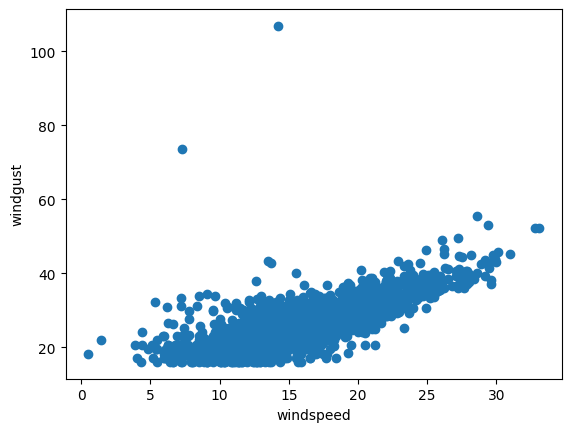

In [107]:
#plot correlation between windspeed and windgust
plt.scatter(weather.windspeed, weather.windgust)
plt.xlabel("windspeed")
plt.ylabel("windgust")

In [108]:
#windgust is highly correlated with windspeed, so we can drop windgust
weather.drop("windgust", axis=1, inplace=True)

In [109]:
#we can drop severerisk because 100% of the values are nan
weather.drop("severerisk", axis=1, inplace=True)

In [110]:
#solarenergy is nan 40% of the time, let's explore why
weather[["solarenergy", "solarradiation", "cloudcover", "uvindex"]].corr()

,solarenergy,solarradiation,cloudcover,uvindex
solarenergy,1.000000,0.999566,-0.304275,0.994684
solarradiation,0.999566,1.000000,-0.304971,0.995119
cloudcover,-0.304275,-0.304971,1.000000,-0.300604
uvindex,0.994684,0.995119,-0.300604,1.000000


In [111]:
#solar energy is highly correlated with solarradiation and uvindex, so we can drop solarenergy
weather.drop("solarenergy", axis=1, inplace=True)

##### Categorical variables

In [112]:
#unique values for conditions
weather.conditions.value_counts()

Partially cloudy          4369
Overcast                  1614
Clear                      515
Rain, Overcast             473
Rain, Partially cloudy     131
Snow, Overcast             109
Snow, Rain, Overcast        74
Snow, Partially cloudy      10
Name: conditions, dtype: int64

In [113]:
#we can put together Snow, Rain, Overcat +  Snow, Rain, Partially cloudy
#we can put together Snow, Partially cloudy + Snow, Overcast
weather.conditions.replace({ "Snow, Partially cloudy": "Snow, Overcast"}, inplace=True)

In [114]:
weather.conditions.unique()
#rename values
weather.conditions.replace({"Partially cloudy": "Partly_cloudy",  'Snow, Rain, Overcast': "Snow_rain_overcast",
         'Snow, Overcast': "Snow_overcast", 'Rain, Overcast': "Rain_overcast", "Rain, Partially cloudy": "Rain_partly_cloudy", 
                    }, inplace=True)

In [115]:
#set conditions values as columns
weather = pd.get_dummies(weather, columns=["conditions"])
weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,uvindex,icon,stations,conditions_Clear,conditions_Overcast,conditions_Partly_cloudy,conditions_Rain_overcast,conditions_Rain_partly_cloudy,conditions_Snow_overcast,conditions_Snow_rain_overcast
0,New York State,2022-01-01T00:00:00,39.9,36.4,37.2,90.08,0.00,0,No precipitation,0.05,...,NaN,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",0,1,0,0,0,0,0
1,New York State,2022-01-01T01:00:00,41.9,38.3,38.0,86.10,0.00,0,No precipitation,0.05,...,NaN,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",0,1,0,0,0,0,0
2,New York State,2022-01-01T02:00:00,42.8,40.0,38.8,85.86,0.00,0,No precipitation,0.05,...,NaN,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",0,1,0,0,0,0,0
3,New York State,2022-01-01T03:00:00,44.6,43.1,40.7,86.06,0.01,100,rain,0.05,...,NaN,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",0,0,0,1,0,0,0
4,New York State,2022-01-01T04:00:00,45.7,44.7,41.9,86.44,0.00,0,No precipitation,0.05,...,NaN,snow,"71752099999,72528014733,KGVQ,KIAG,72528704724,...",0,1,0,0,0,0,0


In [116]:
#drop conditions icon becuase we already have conditions
weather.drop("icon", axis=1, inplace=True)

In [117]:
#drop stations column becuase we don't need it
weather.drop("stations", axis=1, inplace=True)

In [118]:
#preciptype column
print(weather.preciptype.unique())
#rename values in preciptype
weather.preciptype.replace({"No precipitation": "no_precipitation", "rain,snow":"rain_and_snow"}, inplace=True)
#set preciptype values as columns
weather = pd.get_dummies(weather, columns=["preciptype"])

['No precipitation' 'rain' 'rain,snow' 'snow']


In [119]:
#transform datetime into date with hour in weather data
weather['Datetime'] = pd.to_datetime(weather['datetime'])
#drop first two columns
weather = weather.drop(['datetime','name'], axis=1)
weather.head()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,...,conditions_Partly_cloudy,conditions_Rain_overcast,conditions_Rain_partly_cloudy,conditions_Snow_overcast,conditions_Snow_rain_overcast,preciptype_no_precipitation,preciptype_rain,preciptype_rain_and_snow,preciptype_snow,Datetime
0,39.9,36.4,37.2,90.08,0.00,0,0.05,0.79,4.9,110,...,0,0,0,0,0,1,0,0,0,2022-01-01 00:00:00
1,41.9,38.3,38.0,86.10,0.00,0,0.05,0.84,5.5,135,...,0,0,0,0,0,1,0,0,0,2022-01-01 01:00:00
2,42.8,40.0,38.8,85.86,0.00,0,0.05,0.89,4.7,101,...,0,0,0,0,0,1,0,0,0,2022-01-01 02:00:00
3,44.6,43.1,40.7,86.06,0.01,100,0.05,0.94,3.5,147,...,0,1,0,0,0,0,1,0,0,2022-01-01 03:00:00
4,45.7,44.7,41.9,86.44,0.00,0,0.05,0.98,3.1,192,...,0,0,0,0,0,1,0,0,0,2022-01-01 04:00:00


In [120]:
weather.columns

Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partly_cloudy',
       'conditions_Rain_overcast', 'conditions_Rain_partly_cloudy',
       'conditions_Snow_overcast', 'conditions_Snow_rain_overcast',
       'preciptype_no_precipitation', 'preciptype_rain',
       'preciptype_rain_and_snow', 'preciptype_snow', 'Datetime'],
      dtype='object')

In [121]:
print(weather.shape, energy.shape) #we have one more row in weather, why?

(7295, 27) (7296, 12)


In [122]:
#weather unique datetime
len(energy.Datetime.unique())

7296

In [123]:
#date in energy that are not in weather
#energy[~energy.Datetime.isin(weather.Datetime)].Datetime.unique() 

In [124]:
#energy eliminate row with datetime 2022-01-01 00:00:00, it is not in weather data
energy = energy[energy.Datetime != "2022-01-01 00:00:00"]

#### ENERGY

In [125]:
energy.head()

,Datetime,Day,Month,Hour,Year,Dual Fuel_Gen_MW,Hydro_Gen_MW,Natural Gas_Gen_MW,Nuclear_Gen_MW,Other Fossil Fuels_Gen_MW,Solar_Gen_MW,Wind_Gen_MW
1,2022-01-01 01:00:00,1.0,1.0,1.0,2022.0,28523.0,28414.0,21392.0,40031.0,36.0,2922.0,9891.0
2,2022-01-01 02:00:00,1.0,1.0,2.0,2022.0,27699.0,28854.0,21776.0,40024.0,36.0,2906.0,7843.0
3,2022-01-01 03:00:00,1.0,1.0,3.0,2022.0,26788.0,29620.0,20171.0,40012.0,36.0,2890.0,8555.0
4,2022-01-01 04:00:00,1.0,1.0,4.0,2022.0,27341.0,30051.0,22813.0,40005.0,36.0,2878.0,8223.0
5,2022-01-01 05:00:00,1.0,1.0,5.0,2022.0,28097.0,30142.0,23292.0,39985.0,36.0,2911.0,8363.0


In [126]:
energy.dtypes

Datetime                      object
Day                          float64
Month                        float64
Hour                         float64
Year                         float64
Dual Fuel_Gen_MW             float64
Hydro_Gen_MW                 float64
Natural Gas_Gen_MW           float64
Nuclear_Gen_MW               float64
Other Fossil Fuels_Gen_MW    float64
Solar_Gen_MW                 float64
Wind_Gen_MW                  float64
dtype: object

In [127]:
#transform datetime into date with hour in energy data
energy['Datetime'] = pd.to_datetime(energy['Datetime'])

In [128]:
#merge weather and energy data by datetime
merged_data = pd.merge(energy, weather, on='Datetime')
merged_data.head()

,Datetime,Day,Month,Hour,Year,Dual Fuel_Gen_MW,Hydro_Gen_MW,Natural Gas_Gen_MW,Nuclear_Gen_MW,Other Fossil Fuels_Gen_MW,...,conditions_Overcast,conditions_Partly_cloudy,conditions_Rain_overcast,conditions_Rain_partly_cloudy,conditions_Snow_overcast,conditions_Snow_rain_overcast,preciptype_no_precipitation,preciptype_rain,preciptype_rain_and_snow,preciptype_snow
0,2022-01-01 01:00:00,1.0,1.0,1.0,2022.0,28523.0,28414.0,21392.0,40031.0,36.0,...,1,0,0,0,0,0,1,0,0,0
1,2022-01-01 02:00:00,1.0,1.0,2.0,2022.0,27699.0,28854.0,21776.0,40024.0,36.0,...,1,0,0,0,0,0,1,0,0,0
2,2022-01-01 03:00:00,1.0,1.0,3.0,2022.0,26788.0,29620.0,20171.0,40012.0,36.0,...,0,0,1,0,0,0,0,1,0,0
3,2022-01-01 04:00:00,1.0,1.0,4.0,2022.0,27341.0,30051.0,22813.0,40005.0,36.0,...,1,0,0,0,0,0,1,0,0,0
4,2022-01-01 05:00:00,1.0,1.0,5.0,2022.0,28097.0,30142.0,23292.0,39985.0,36.0,...,1,0,0,0,0,0,1,0,0,0


In [129]:
merged_data.shape

(7294, 38)

In [130]:
#merged data unique values for each column
merged_data.nunique()

Datetime                         7294
Day                                31
Month                              10
Hour                               24
Year                                1
Dual Fuel_Gen_MW                 6846
Hydro_Gen_MW                     6434
Natural Gas_Gen_MW               6761
Nuclear_Gen_MW                   3937
Other Fossil Fuels_Gen_MW        1115
Solar_Gen_MW                     1776
Wind_Gen_MW                      5724
temp                              791
feelslike                         973
dew                               758
humidity                         4190
precip                            149
precipprob                          2
snow                               19
snowdepth                         768
windspeed                         270
winddir                           361
sealevelpressure                  431
cloudcover                        251
visibility                         95
solarradiation                    800
uvindex     

In [131]:
merged_data.dtypes

Datetime                         datetime64[ns]
Day                                     float64
Month                                   float64
Hour                                    float64
Year                                    float64
Dual Fuel_Gen_MW                        float64
Hydro_Gen_MW                            float64
Natural Gas_Gen_MW                      float64
Nuclear_Gen_MW                          float64
Other Fossil Fuels_Gen_MW               float64
Solar_Gen_MW                            float64
Wind_Gen_MW                             float64
temp                                    float64
feelslike                               float64
dew                                     float64
humidity                                float64
precip                                  float64
precipprob                                int64
snow                                    float64
snowdepth                               float64
windspeed                               

In [132]:
merged_data.shape[0]

7294

In [133]:
#percentage of missing values in each column
merged_data.isna().sum()/merged_data.shape[0]

Datetime                         0.00000
Day                              0.00000
Month                            0.00000
Hour                             0.00000
Year                             0.00000
Dual Fuel_Gen_MW                 0.00000
Hydro_Gen_MW                     0.00000
Natural Gas_Gen_MW               0.00000
Nuclear_Gen_MW                   0.00000
Other Fossil Fuels_Gen_MW        0.00000
Solar_Gen_MW                     0.00000
Wind_Gen_MW                      0.00000
temp                             0.00000
feelslike                        0.00000
dew                              0.00000
humidity                         0.00000
precip                           0.00000
precipprob                       0.00000
snow                             0.00000
snowdepth                        0.00000
windspeed                        0.00000
winddir                          0.00000
sealevelpressure                 0.00000
cloudcover                       0.00000
visibility      

In [134]:
#download merged data into csv
#merged_data.to_csv('test_data.csv', index=False)

In [135]:
merged_data.columns

Index(['Datetime', 'Day', 'Month', 'Hour', 'Year', 'Dual Fuel_Gen_MW',
       'Hydro_Gen_MW', 'Natural Gas_Gen_MW', 'Nuclear_Gen_MW',
       'Other Fossil Fuels_Gen_MW', 'Solar_Gen_MW', 'Wind_Gen_MW', 'temp',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partly_cloudy',
       'conditions_Rain_overcast', 'conditions_Rain_partly_cloudy',
       'conditions_Snow_overcast', 'conditions_Snow_rain_overcast',
       'preciptype_no_precipitation', 'preciptype_rain',
       'preciptype_rain_and_snow', 'preciptype_snow'],
      dtype='object')

In [136]:
#SOLAR: randomly select 3504 rows (equivalent to validation of 40% found in stable regression)
solar_test = merged_data.sample(n=3504, random_state=1)
#define x and y test
X_test_solar=solar_test.iloc[:,13:38]
y_test_solar=solar_test.iloc[:,11]
#download solar test data into csv
X_test_solar.to_csv('X_test_solar.csv', index=False)
y_test_solar.to_csv('y_test_solar.csv', index=False)

In [137]:
#WIND: randomly select 2628 rows (equivalent to validation of 30% found in stable regression)
wind_test = merged_data.sample(n=2628, random_state=1)
#define x and y test
X_test_wind=wind_test.iloc[:,13:38]
y_test_wind=wind_test.iloc[:,12]
#download wind test data into csv
X_test_wind.to_csv('X_test_wind.csv', index=False)
y_test_wind.to_csv('y_test_wind.csv', index=False)